In [2]:
# Install required libraries
!pip install pandas scipy scikit-learn seaborn matplotlib

# Import required libraries
import pandas as pd
from IPython.display import display
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/ObesityDataSet_raw_and_data_sinthetic.csv')
# Descriptive statistics
df.describe()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


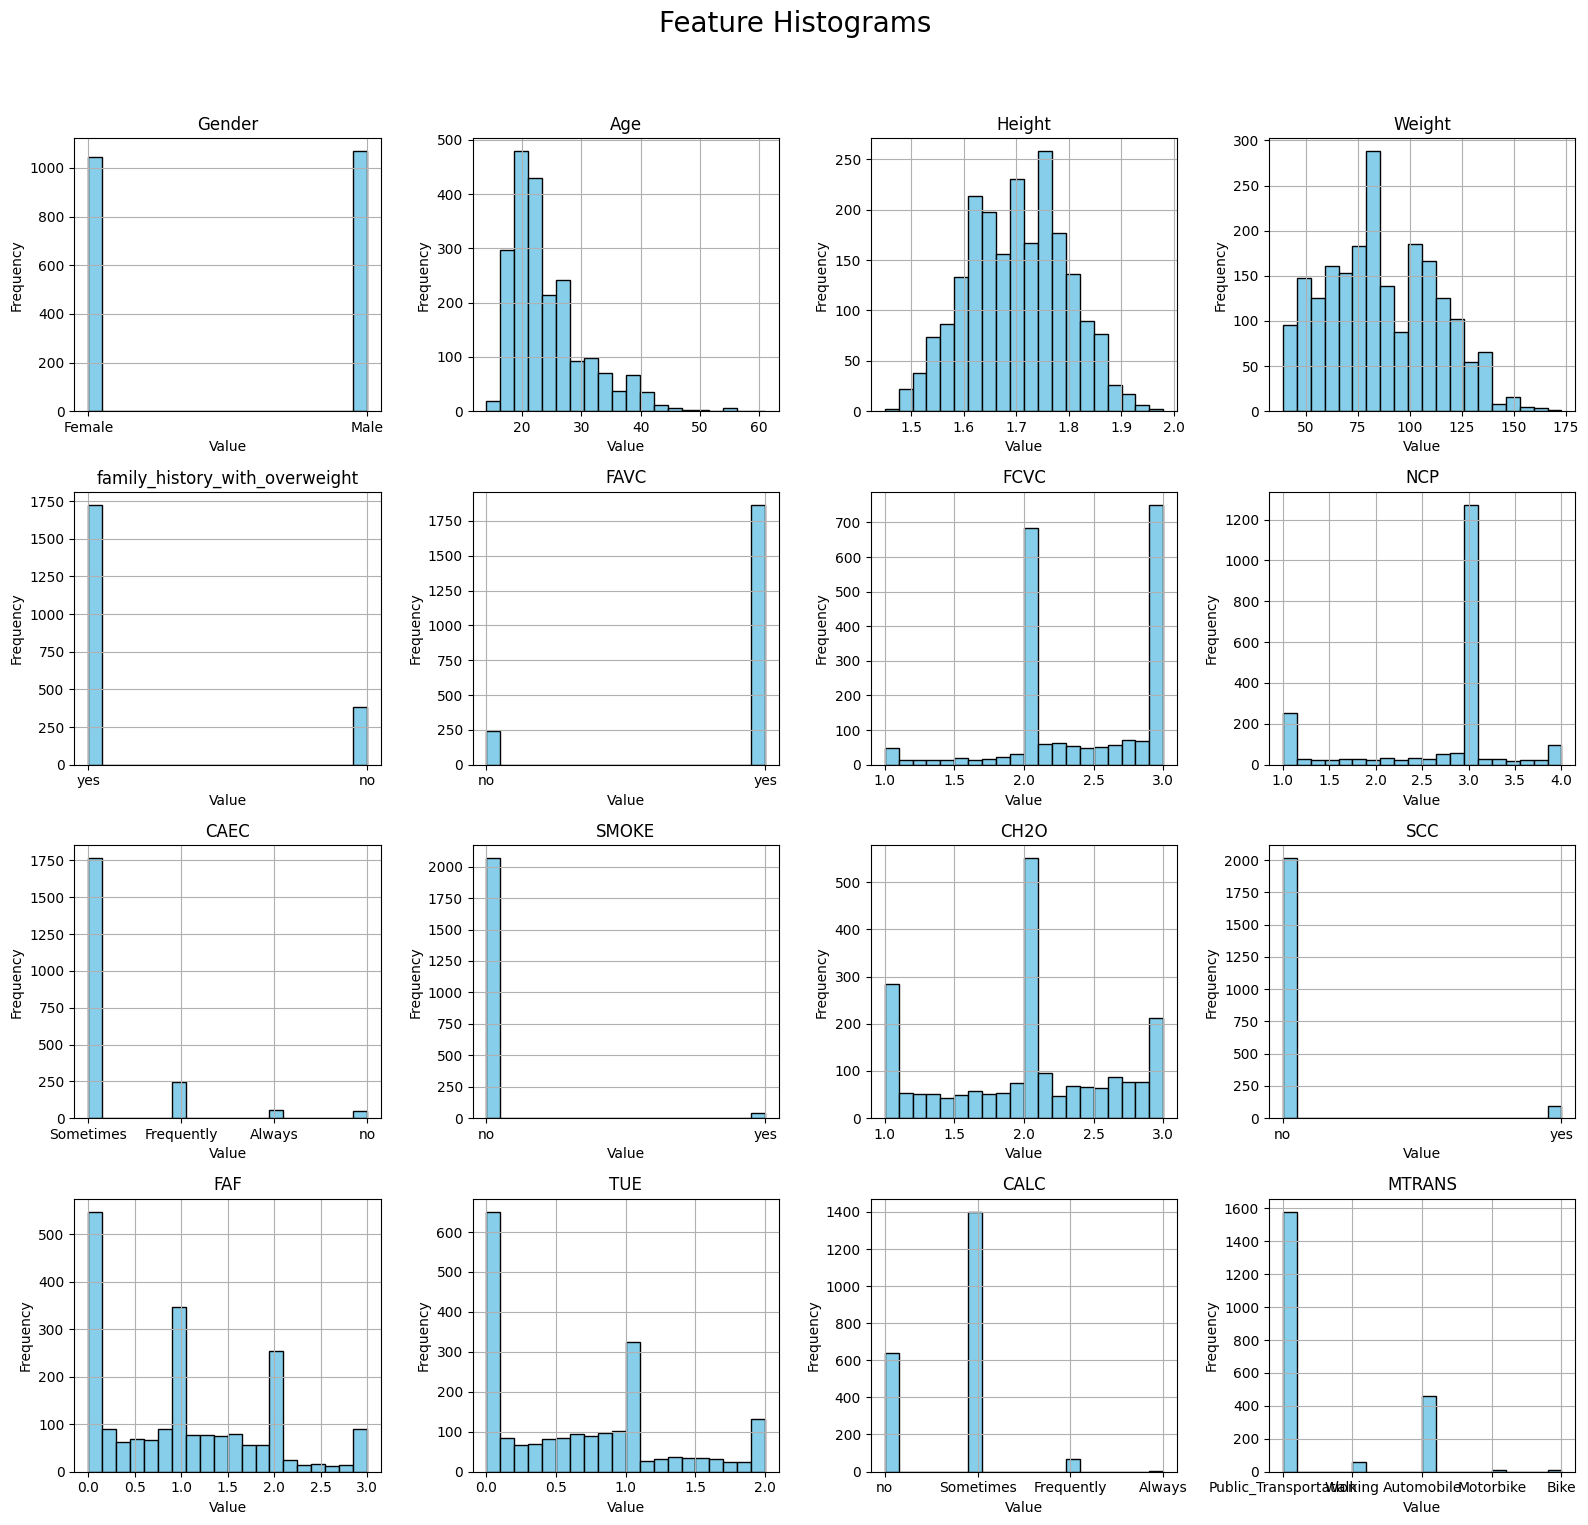

In [12]:
import math
import matplotlib.pyplot as plt

# Define the correct target column name
target_column = 'NObeyesdad'  # Updated target column name
features = df.columns[df.columns != target_column]  # Exclude the target column

# Number of features to plot
num_features = len(features)  # Number of feature columns
num_cols = 4  # Number of columns for the grid
num_rows = math.ceil(num_features / num_cols)  # Calculate required rows

# Set up the grid for subplots to display each feature's histogram
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 4))
fig.suptitle("Feature Histograms", fontsize=20)  # Title for all histograms

# Plot each feature in a separate subplot
for i, feature in enumerate(features):
    row, col = divmod(i, num_cols)
    df[feature].hist(bins=20, ax=axes[row, col], color='skyblue', edgecolor='black')
    axes[row, col].set_title(feature)
    axes[row, col].set_xlabel("Value")
    axes[row, col].set_ylabel("Frequency")

# Remove any empty subplot if number of features is not a multiple of num_cols
for j in range(i + 1, num_rows * num_cols):
    row, col = divmod(j, num_cols)
    fig.delaxes(axes[row, col])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title and reduce spacing
plt.show()


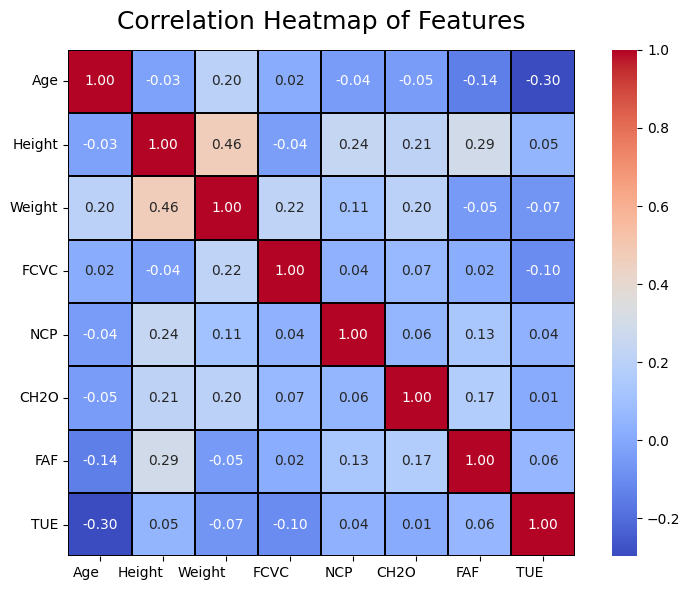

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for the correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Generate a heatmap with improved aesthetics
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True,
            linewidths=0.3, linecolor='black', annot_kws={"size": 10})

# Title and other aesthetics
plt.title("Correlation Heatmap of Features", fontsize=18, pad=15)
plt.xticks(rotation=0, fontsize=10, ha='right')
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()

plt.show()


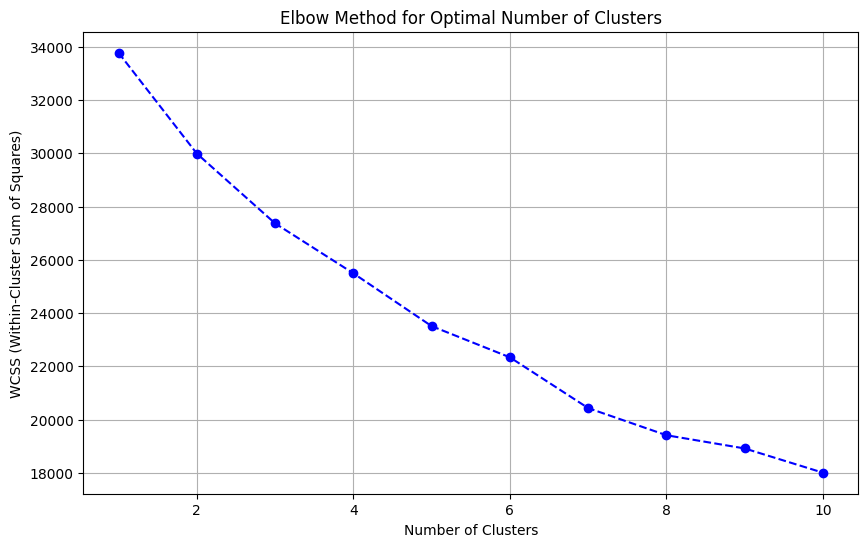

In [17]:
import math
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Define the target column (this should be excluded from clustering)
target_column = 'NObeyesdad'  # Replace with your target column name
features = df.columns[df.columns != target_column]  # Exclude the target column

# Handle categorical columns by encoding them into numeric values
# Identify categorical columns
categorical_cols = df[features].select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Scale the features to normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# Calculate WCSS (Within-Cluster Sum of Squares) for different values of K
wcss = []
for i in range(1, 11):  # Test for K values from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the Elbow Method graph
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', color='b', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()


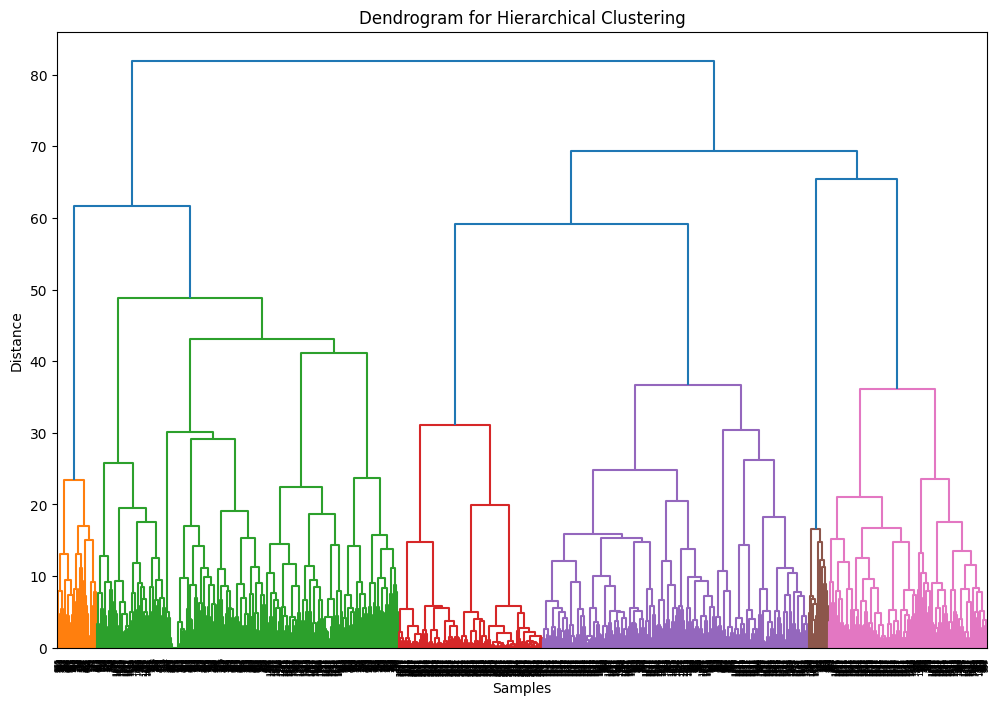

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage

# Define the target column (this should be excluded from clustering)
target_column = 'NObeyesdad'  # Replace with your target column name
features = df.columns[df.columns != target_column]  # Exclude the target column

# Handle categorical columns by encoding them into numeric values
categorical_cols = df[features].select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Scale the features to normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# Perform hierarchical clustering using linkage method (Ward's method)
linked = linkage(scaled_features, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


Class Balance:
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272


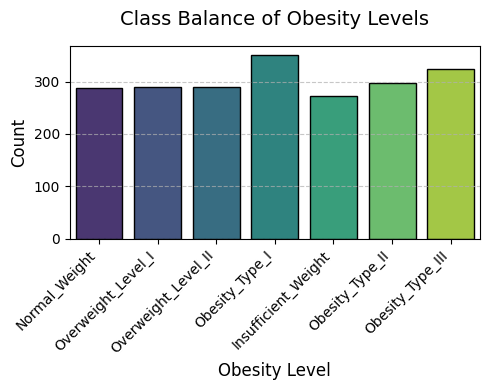

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check class balance with clean output
print("Class Balance:")
print(df['NObeyesdad'].value_counts().to_string(index=True))

# Visualize class balance with a smaller, visually appealing plot
plt.figure(figsize=(5, 4))  # Adjust figure size
sns.countplot(data=df, x='NObeyesdad', palette="viridis", edgecolor='black')  # Edge color for visual clarity

# Title and labels
plt.title("Class Balance of Obesity Levels", fontsize=14, pad=15)
plt.xlabel("Obesity Level", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Adjusting ticks and adding a light grid for readability
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add light grid on the y-axis

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [ ]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum().to_dict()  # Convert to dictionary to remove dtype

# Display missing values information
print("Missing Values Per Feature:")
for feature, count in missing_values.items():
    print(f"{feature}: {count}")

# Check and display if there are any missing values
total_missing = sum(missing_values.values())
if total_missing == 0:
    print("\nNo missing values detected in the dataset.")
else:
    print(f"\nTotal missing values in dataset: {total_missing}")
    print("Proceeding to drop rows with missing values (if applicable).")

    # Drop rows with missing values
    df = df.dropna()

    # Confirm missing values removal
    print("\nUpdated Missing Values Count After Dropping Rows:")
    updated_missing_values = df.isnull().sum().to_dict()
    for feature, count in updated_missing_values.items():
        print(f"{feature}: {count}")

    print("\nRows with missing values have been removed.")


Missing Values Per Feature:
Gender: 0
Age: 0
Height: 0
Weight: 0
family_history_with_overweight: 0
FAVC: 0
FCVC: 0
NCP: 0
CAEC: 0
SMOKE: 0
CH2O: 0
SCC: 0
FAF: 0
TUE: 0
CALC: 0
MTRANS: 0
NObeyesdad: 0

No missing values detected in the dataset.


In [ ]:
import numpy as np

def cap_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Cap outliers to the calculated bounds
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

# Select numeric features in the dataset for outlier treatment
numeric_features = df.select_dtypes(include=[np.number]).columns
df = cap_outliers(df, numeric_features)

# Display descriptive statistics to confirm outlier capping
df.describe().style.set_caption("Capped Outliers")


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,23.910277,1.701676,86.584811,2.419043,2.835525,2.008011,1.010298,0.657866
std,5.277434,0.093299,26.187117,0.533927,0.400898,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,2.146845,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,35.079212,1.976160,170.366691,3.000000,3.511893,3.000000,3.000000,2.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import numpy as np

# Encode the target variable
encoder = LabelEncoder()
df['NObeyesdad'] = encoder.fit_transform(df['NObeyesdad'])  # Encoding the 'NObeyesdad' column

# Display encoded target variable
print("Encoded Target Variable:")
print(df['NObeyesdad'].unique())  # Unique encoded values
print("Classes:", encoder.classes_)  # Shows mapping of original class names to encoded values

# Scale numeric features
numeric_features = df.select_dtypes(include=[np.number]).columns  # Identify numeric features
scaler = MinMaxScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Display scaled data as a styled table
df.head().style.set_caption("Scaled Data (First 5 Rows)").set_table_styles(
    [{'selector': 'caption', 'props': [('font-size', '16px'), ('text-align', 'center')]}]
)


Encoded Target Variable:
[1 5 6 2 0 3 4]
Classes: ['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,0.332081,0.323096,0.190307,yes,no,0.500000,0.625000,Sometimes,no,0.500000,no,0.000000,0.500000,no,Public_Transportation,0.166667
1,Female,0.332081,0.133039,0.129409,yes,no,1.000000,0.625000,Sometimes,yes,1.000000,yes,1.000000,0.000000,Sometimes,Public_Transportation,0.166667
2,Male,0.426961,0.665197,0.289267,yes,no,0.500000,0.625000,Sometimes,no,0.500000,no,0.666667,0.500000,Frequently,Public_Transportation,0.166667
3,Male,0.616721,0.665197,0.365389,no,no,1.000000,0.625000,Sometimes,no,0.500000,no,0.666667,0.000000,Frequently,Walking,0.833333
4,Male,0.379521,0.627186,0.386704,no,no,0.500000,0.000000,Sometimes,no,0.500000,no,0.000000,0.000000,Sometimes,Public_Transportation,1.000000


K-Means Clustering Performance:
Silhouette Score: 0.20
Calinski-Harabasz Index: 223.98

Agglomerative Clustering Performance:
Silhouette Score: 0.15
Calinski-Harabasz Index: 218.19



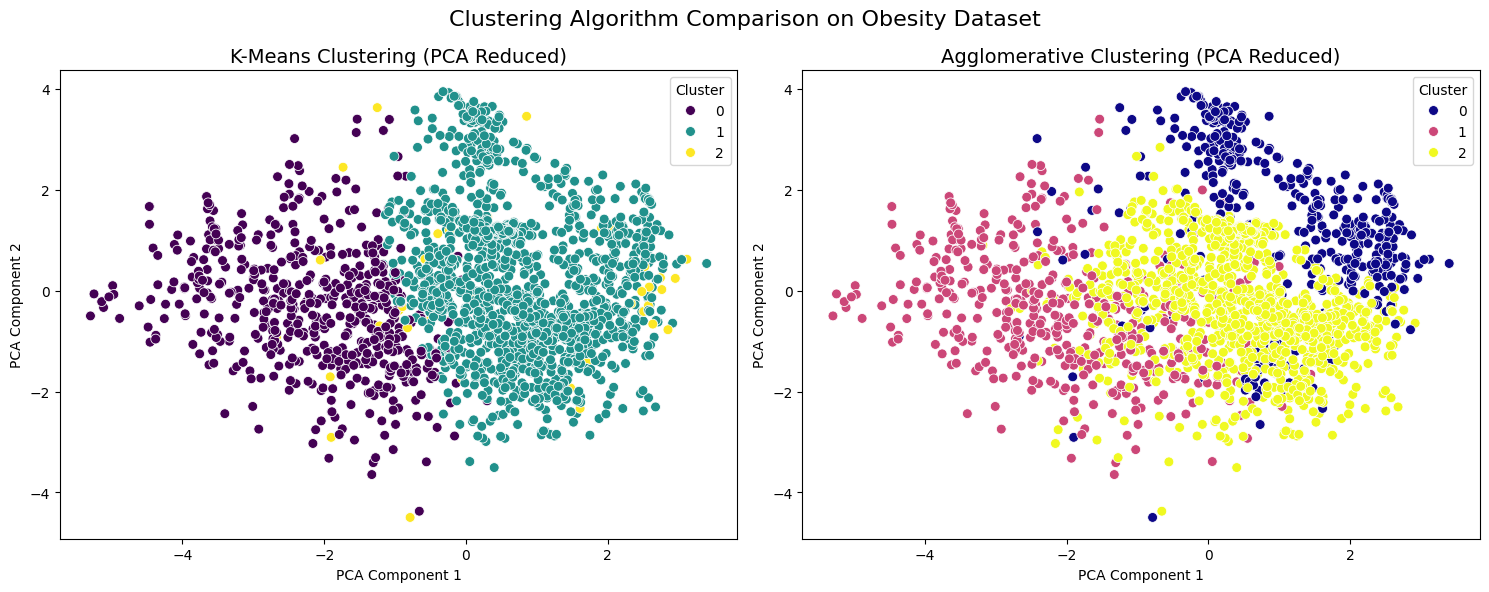

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is preprocessed, scaled, and cleaned.

# Encode categorical columns if any
label_encoder = LabelEncoder()

# List all columns to encode
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Set features for clustering (drop target variable if it exists)
X = df.drop(columns=['NObeyesdad'], errors='ignore')

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize models
kmeans = KMeans(n_clusters=3, random_state=42)
agg_clustering = AgglomerativeClustering(n_clusters=3)

# Fit models
kmeans_labels = kmeans.fit_predict(X_scaled)
agg_labels = agg_clustering.fit_predict(X_scaled)

# Model Performance Evaluation
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
agg_silhouette = silhouette_score(X_scaled, agg_labels)

kmeans_ch_score = calinski_harabasz_score(X_scaled, kmeans_labels)
agg_ch_score = calinski_harabasz_score(X_scaled, agg_labels)

# Display performance metrics
print("K-Means Clustering Performance:")
print(f"Silhouette Score: {kmeans_silhouette:.2f}")
print(f"Calinski-Harabasz Index: {kmeans_ch_score:.2f}\n")

print("Agglomerative Clustering Performance:")
print(f"Silhouette Score: {agg_silhouette:.2f}")
print(f"Calinski-Harabasz Index: {agg_ch_score:.2f}\n")

# Visualizing Clusters Using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# K-Means Clustering Visualization
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis', ax=ax[0], s=50)
ax[0].set_title("K-Means Clustering (PCA Reduced)", fontsize=14)
ax[0].set_xlabel("PCA Component 1")
ax[0].set_ylabel("PCA Component 2")
ax[0].legend(title="Cluster")

# Agglomerative Clustering Visualization
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=agg_labels, palette='plasma', ax=ax[1], s=50)
ax[1].set_title("Agglomerative Clustering (PCA Reduced)", fontsize=14)
ax[1].set_xlabel("PCA Component 1")
ax[1].set_ylabel("PCA Component 2")
ax[1].legend(title="Cluster")

plt.suptitle("Clustering Algorithm Comparison on Obesity Dataset", fontsize=16)
plt.tight_layout()
plt.show()
